# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Importing the module needed for the project
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Adding the API key
from api_keys import weather_api_key

# citypy module
from citipy import citipy

# Saving the file in a csv format in the output directory
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
   
    response_json = requests.get(query_url + city).json()
    
 
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: kapaa, City ID: 5848280
City Name: atuona, City ID: 4020109
City Name: ahipara, City ID: 2194098
City Name: ushuaia, City ID: 3833367
City Name: cabo san lucas, City ID: 3985710
City Name: georgetown, City ID: 1735106
City Name: hamilton, City ID: 4513583
City Name: talnakh, City ID: 1490256
City Name: yulara, City ID: 6355222
City Name: vestmannaeyjar, City ID: 3412093
That record does not exist, searching for next record...
City Name: norman wells, City ID: 6089245
City Name: avera, City ID: 4231997
City Name: alofi, City ID: 4036284
City Name: ponta do sol, City ID: 2264557
City Name: port alfred, City ID: 964432
City Name: tambacounda, City ID: 2244991
City Name: cape town, City ID: 3369157
City Name: airai, City ID: 1651810
That record does not exist, searching for next record...
City Name: suoyarvi, City ID: 486186
That record does not exist, searching for next record...
City Name: basco, City ID: 1726449
City Name: busselton, City ID: 2075265
City Name: thompson, City

City Name: taylorville, City ID: 4251141
That record does not exist, searching for next record...
City Name: abaca, City ID: 1732531
City Name: padang, City ID: 1633419
City Name: hithadhoo, City ID: 1282256
That record does not exist, searching for next record...
City Name: waipawa, City ID: 2206874
City Name: chifeng, City ID: 2038067
City Name: talaja, City ID: 1255175
That record does not exist, searching for next record...
City Name: samarai, City ID: 2132606
City Name: letlhakane, City ID: 933535
City Name: nhulunbuy, City ID: 2064735
City Name: seoul, City ID: 1835848
City Name: college, City ID: 5859699
City Name: broome, City ID: 5110365
City Name: tottori, City ID: 1849892
City Name: jumla, City ID: 1283285
That record does not exist, searching for next record...
City Name: barzas, City ID: 1510817
That record does not exist, searching for next record...
City Name: tanout, City ID: 2439155
City Name: sur, City ID: 286245
City Name: mar del plata, City ID: 3430863
City Name: n

City Name: barabash, City ID: 2027142
City Name: svetlyy, City ID: 485660
City Name: diu, City ID: 1272502
City Name: kieta, City ID: 2094027
That record does not exist, searching for next record...
City Name: maloy, City ID: 3146487
City Name: vila velha, City ID: 3445026
City Name: paris, City ID: 2988507
City Name: omboue, City ID: 2396853
City Name: mitsamiouli, City ID: 921786
City Name: jinka, City ID: 333750
City Name: beloha, City ID: 1067565
That record does not exist, searching for next record...
City Name: katangli, City ID: 2122783
City Name: raga, City ID: 368246
City Name: nikolskoye, City ID: 546105
City Name: marathon, City ID: 5261790
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: half moon bay, City ID: 5354943
City Name: dortmund, City ID: 2935517
City Name: pringsewu, City ID: 1630639
City Name: anloga, City ID: 2304548
City Name: kaitangata, City ID: 2208248
City Name: puerto madero, City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5848280,Kapaa,US,22.08,-159.32,77.00,65,75,6.93
1,4020109,Atuona,PF,-9.80,-139.03,82.45,75,84,11.34
2,2194098,Ahipara,NZ,-35.17,173.17,65.34,66,36,6.89
3,3833367,Ushuaia,AR,-54.80,-68.30,41.00,81,20,5.82
4,3985710,Cabo San Lucas,MX,22.89,-109.91,68.47,60,75,10.29


In [10]:
# Export to the output folder
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

##### This plot is looking at the relationship between latitude and temperature.  It shows that as you aprroach the equator (latitude 0) the temperature gets hotter.

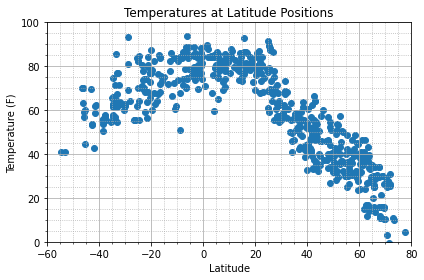

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

#### Latitude vs. Humidity Plot

##### This plot is looking at the relationship between latitude and humidity.  It shows that there is not much of a correlation between latitude and humidity.

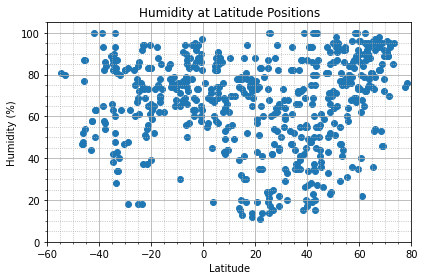

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

#### Latitude vs. Cloudiness Plot

##### This plot is looking at the relationship between latitude and cloudiness.  This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

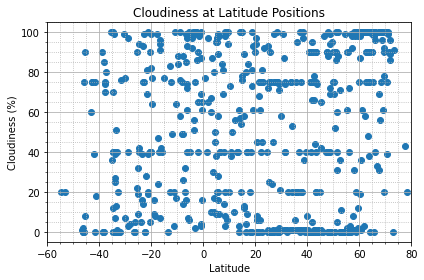

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

#### Latitude vs. Wind Speed Plot

##### This plot is looking at the relationship between latitude and wind speed.  It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

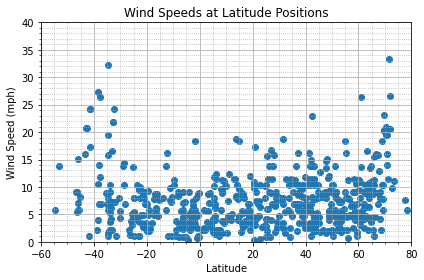

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# def linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     correlation = st.pearsonr(x_values, y_values)
    
#     print(f"r-squared: {rvalue**2}")
#     print(f"Correlation: {correlation}")
#     print(f"Line: {line_eq}")

#     return regress_values, line_eq



In [16]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

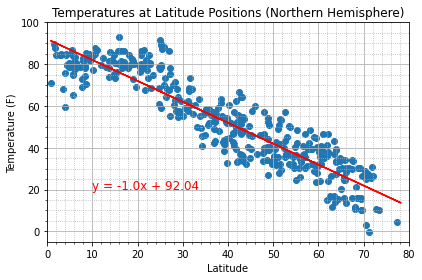

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

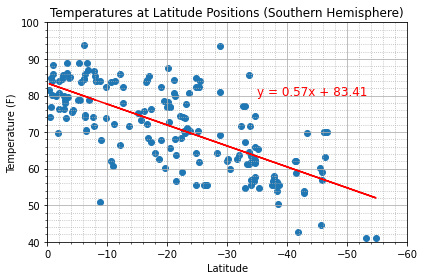

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

### Max Temp vs. Latitude Linear Regression
##### Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature.  As you get closer to the equator (latitude 0) the higher the temperature gets.  There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

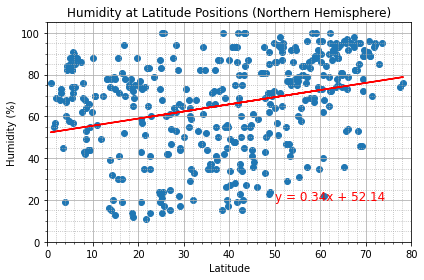

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

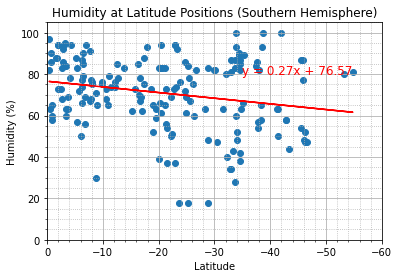

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

### Humidity % vs. Latitude Linear Regression
##### There does not seem to be a very strong correlation between humidity and latitude.  However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

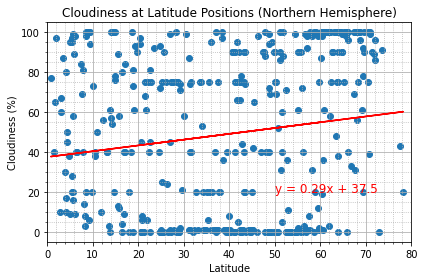

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

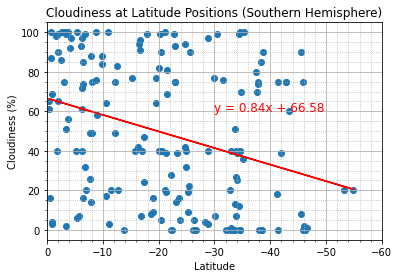

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

### Cloudiness vs. Latitude Linear Regression
##### There does not seem to be much correlation between cloudiness and latitude when you look at the plots.  However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere.  In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

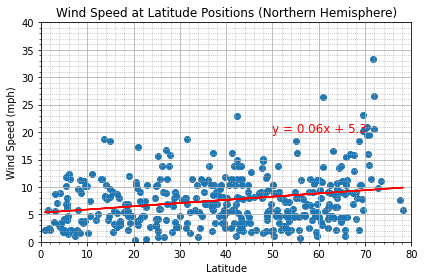

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

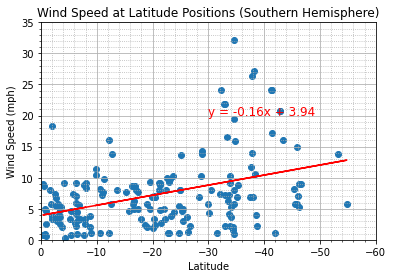

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")

### Wind Speed vs. Latitude Linear Regression
##### There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots.  However, the linear regresion shows a much lower correlation than it appears.  There is still a definite correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, but the slope of the regression line is much shallower than I was expecting looking at the plots.